# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
fuel_consumption_raw = pd.read_csv('data/fuel_comsumption.csv')
passengers_raw = pd.read_csv('data/passengers.csv')
flights_raw = pd.read_csv('data/flights.csv')

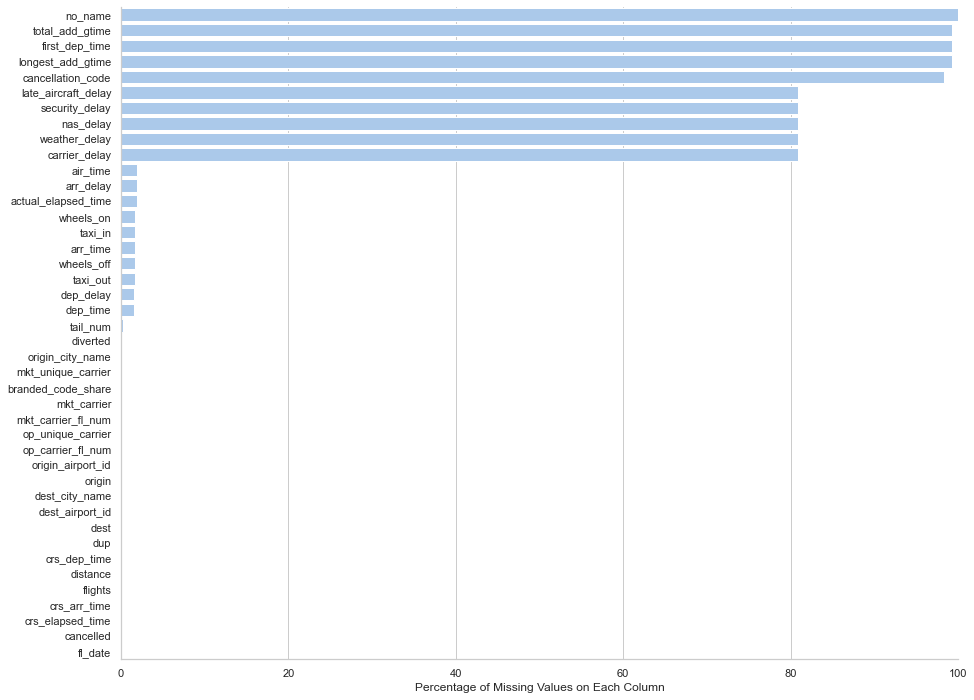

In [7]:
#plotting the percentage of missing values in each column
flights_raw_length = len(flights_raw)
flights_raw_null = (flights_raw.isnull().sum().sort_values(ascending=False)*100/len(flights_raw))
f, ax = plt.subplots(figsize=(15, 12))
sns.set_color_codes("pastel")
sns.set_color_codes("pastel")
ax.set(xlim=(0, 100), ylabel="",
       xlabel="Percentage of Missing Values on Each Column")
sns.barplot(x=flights_raw_null.values, y=flights_raw_null.index, color="b")
sns.despine()

In [8]:
#Dropping columns with above 75 percentage of missing values in flights_raw
#Dropping tail_num column;
flights_raw = flights_raw.drop(columns = ['no_name', 'longest_add_gtime','total_add_gtime'
                                          ,'first_dep_time','late_aircraft_delay','security_delay',
                                          'nas_delay','weather_delay','carrier_delay','cancellation_code','tail_num'],axis=1)

In [9]:
#Dropping rows on fuel_consumption with missing values
#There is total of 25 missing rows out of 3035
fuel_consumption_raw = fuel_consumption_raw.dropna()

In [10]:
#dropping rows where there are cancellation of flight
index_cancelled = flights_raw.loc[flights_raw['cancelled'] == 1].index
flights_raw.drop(index_cancelled,inplace=True)

In [11]:
#dropping rows where there are diverted flight
index_diverted = flights_raw.loc[flights_raw['diverted'] == 1].index
flights_raw.drop(index_diverted,inplace=True)

In [42]:
#Filling the Nan in the flights_raw data
#flights_raw['dep_time'] = flights_raw['dep_time'].fillna(flights_raw['dep_time'].mean())
#flights_raw['dep_delay'] = flights_raw['dep_delay'].fillna(flights_raw['dep_delay'].mean())
#flights_raw['taxi_out'] = flights_raw['taxi_out'].fillna(flights_raw['taxi_out'].mean())
#flights_raw['wheels_off'] = flights_raw['wheels_off'].fillna(flights_raw['wheels_off'].mean())
#flights_raw['wheels_on'] = flights_raw['wheels_on'].fillna(flights_raw['wheels_off'].mean())
#flights_raw['taxi_in'] = flights_raw['taxi_in'].fillna(flights_raw['taxi_in'].mean())
#flights_raw['arr_time'] = flights_raw['arr_time'].fillna(flights_raw['arr_time'].mean())
#flights_raw['arr_delay'] = flights_raw['arr_delay'].fillna(flights_raw['arr_delay'].mean())
#flights_raw['actual_elapsed_time'] = flights_raw['actual_elapsed_time'].fillna(flights_raw['actual_elapsed_time'].mean())
#flights_raw['crs_elapsed_time'] = flights_raw['crs_elapsed_time'].fillna(flights_raw['crs_elapsed_time'].mean())
#flights_raw['air_time'] = flights_raw['air_time'].fillna(flights_raw['air_time'].mean())
#dropping the NA columns(total of 725 from 300K)
flights_raw = flights_raw.dropna()

In [101]:
#exporting cleaned files to csv
#flights_raw.to_csv('flights_2019_cleaned.csv')
#passengers_raw.to_csv('passengers_2019_cleaned.csv')
#fuel_consumption_raw.to_csv('fuel_consumption_2019_cleaned.csv')

In [43]:
flights_cleaned_len = len(flights_raw)

In [44]:
#total loss of data
print("total loss of data after cleaning: "\
      ,(flights_raw_length - flights_cleaned_len)/flights_raw_length  * 100)

total loss of data after cleaning:  1.9516666666666669


In [50]:
#Exporting the cleaned files
flights_raw.to_csv('data/flights_cleaned.csv')
passengers_raw.to_csv('data/passengers_cleaned.csv')
fuel_consumption_raw.to_csv('data/fuel_cleaned_2019_01.csv')

In [4]:
flights_raw.arr_delay.mean()

5.564808523360422